1、Iris数据集可视化

In [168]:
pip install pyecharts

In [169]:
from sklearn import datasets
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Scatter3D
from pyecharts.faker import Faker

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

iris = datasets.load_iris()
iris_df = pd.DataFrame({
        'x0':[iris.data[i][0] for i in range(len(iris.data))],
        'x1':[iris.data[i][1] for i in range(len(iris.data))],
        'x2':[iris.data[i][2] for i in range(len(iris.data))],
        'x3':[iris.data[i][3] for i in range(len(iris.data))],
        'type':iris.target
    })
#典型的DataFrame数据筛选操作（方括号内的布尔表达式）
df_type0=iris_df[iris_df.type==0]
df_type1=iris_df[iris_df.type==1]
df_type2=iris_df[iris_df.type==2]

data_type0=[[df_type0.x0.iloc[i],df_type0.x1.iloc[i],df_type0.x2.iloc[i]] for i in range(df_type0.shape[0])]
data_type1=[[df_type1.x0.iloc[i],df_type1.x1.iloc[i],df_type1.x2.iloc[i]] for i in range(df_type1.shape[0])]
data_type2=[[df_type2.x0.iloc[i],df_type2.x1.iloc[i],df_type2.x2.iloc[i]] for i in range(df_type2.shape[0])]

def scatter3d_base() -> Scatter3D:
    c = (
        Scatter3D()
        .add("", data_type0)
        .add("", data_type1)
        .add("", data_type2)
        .set_global_opts(
            title_opts=opts.TitleOpts("Wj_irisclf"),
            # visualmap_opts=opts.VisualMapOpts(range_color=Faker.visual_color),
            # visualmap_opts=opts.VisualMapOpts(range_color=['#ff0000','#00ff00','#0000ff']),        
        )
        .set_colors(['#ff0000','#00ff00','#0000ff'])
    )
    return c

iris_scatter3d = scatter3d_base()
iris_scatter3d.render()

'/content/render.html'

2、KMeans鸢尾花分类

In [188]:
#加载数据
iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

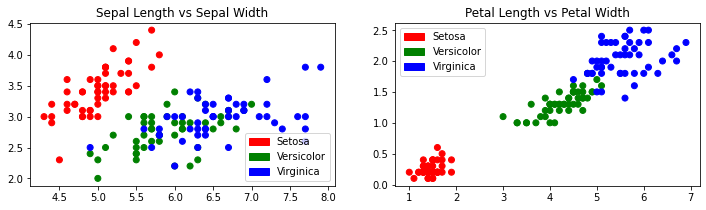

In [189]:
#绘图，数据集前二维特征分布图，后二维特征分布图
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
#第一张图
plt.subplot(1,2,1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])#横轴花萼长 纵轴花萼宽 
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
#第二张图
plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])#横轴花瓣长 纵轴花瓣宽
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [195]:
#调用Sk_learn库KMeans模型进行拟合，聚成3类 每次标签数字都不一样 但是分类的点是一样的 比如第一次执行是0 1 2 第二次执行是1 0 2 第三次可能就变成2 1 0了
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)
#聚完类后，每个样本对应的聚类标签

print("cluster_labels:")
print(iris_k_mean_model.labels_)
#聚类中心
print("cluster_centers:")
print(iris_k_mean_model.cluster_centers_)
print(iris_k_mean_model)

cluster_labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
cluster_centers:
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
KMeans(n_clusters=3)


Text(0.5, 1.0, 'K=3:Petal Length vs Petal Width')

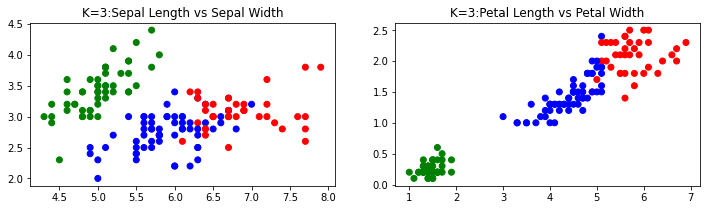

In [197]:
#K=3聚类后花瓣长度，花瓣宽度的特征分布图，花萼长度，花萼的特征分布图，
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
predictedY = np.choose(iris_k_mean_model.labels_, [0, 1, 2]).astype(np.int64)#故意不用0 1 2是因为不想让2图与1图颜色对应，聚类是无监督问题，他只能分清哪些特征向量是一类，并不知道这一类叫什么。2图的名称与颜色对应没有意义，颜色只是因为他是一个类别

plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[predictedY])
plt.title("K=3:Sepal Length vs Sepal Width")

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("K=3:Petal Length vs Petal Width")

In [172]:
#K=3 3D绘图
iris = datasets.load_iris()
iris_df = pd.DataFrame({
        'x0':[iris.data[i][0] for i in range(len(iris.data))],
        'x1':[iris.data[i][1] for i in range(len(iris.data))],
        'x2':[iris.data[i][2] for i in range(len(iris.data))],
        'type':iris_k_mean_model.labels_
    })

#典型的DataFrame数据筛选操作（方括号内的布尔表达式）
df_type0=iris_df[iris_df.type==0]
df_type1=iris_df[iris_df.type==1]
df_type2=iris_df[iris_df.type==2]

data_type0=[[df_type0.x0.iloc[i],df_type0.x1.iloc[i],df_type0.x2.iloc[i]] for i in range(df_type0.shape[0])]
data_type1=[[df_type1.x0.iloc[i],df_type1.x1.iloc[i],df_type1.x2.iloc[i]] for i in range(df_type1.shape[0])]
data_type2=[[df_type2.x0.iloc[i],df_type2.x1.iloc[i],df_type2.x2.iloc[i]] for i in range(df_type2.shape[0])]

def scatter3d_base() -> Scatter3D:
    c = (
        Scatter3D()
        .add("", data_type0)
        .add("", data_type1)
        .add("", data_type2)
        .set_global_opts(
            title_opts=opts.TitleOpts("Wj_irisclf"),
            # visualmap_opts=opts.VisualMapOpts(range_color=Faker.visual_color),
            # visualmap_opts=opts.VisualMapOpts(range_color=['#ff0000','#00ff00','#0000ff']),        
        )
        .set_colors(['#ff0000','#00ff00','#0000ff'])
    )
    return c

iris_scatter3d = scatter3d_base()
iris_scatter3d.render()

'/content/render.html'

cluster_labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 1 1 1 1 2 1 1 1 3
 3 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 3 1 1 1 3 1 1 1 3 3
 1 3]
cluster_centers:
[[5.006      3.428      1.462      0.246     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [6.2525     2.855      4.815      1.625     ]]


Text(0.5, 1.0, 'K=4:Petal Length vs Petal Width')

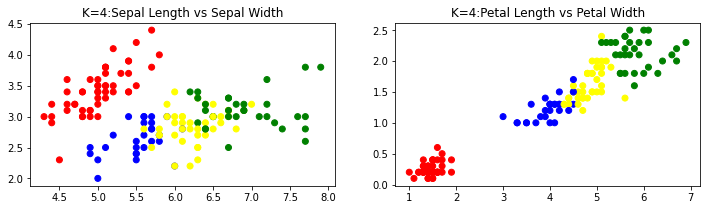

In [198]:
#类似地我们可以将数据集分为K类，只要K<150并且颜色够，以4类为例
iris_k_mean_model = KMeans(n_clusters=4)
iris_k_mean_model.fit(x)
print("cluster_labels:")
print(iris_k_mean_model.labels_)
print("cluster_centers:")
print(iris_k_mean_model.cluster_centers_)
#花瓣长度，花瓣宽度的特征分布图
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue', 'yellow'])
predictedY = np.choose(iris_k_mean_model.labels_, [0, 1, 2, 3]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[predictedY])
plt.title("K=4:Sepal Length vs Sepal Width")
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("K=4:Petal Length vs Petal Width")

In [199]:
#K=4 3D绘图
iris = datasets.load_iris()
iris_df = pd.DataFrame({
        'x0':[iris.data[i][0] for i in range(len(iris.data))],
        'x1':[iris.data[i][1] for i in range(len(iris.data))],
        'x2':[iris.data[i][2] for i in range(len(iris.data))],
        'x3':[iris.data[i][3] for i in range(len(iris.data))],
        'type':iris_k_mean_model.labels_
    })

#典型的DataFrame数据筛选操作（方括号内的布尔表达式）
df_type0=iris_df[iris_df.type==0]
df_type1=iris_df[iris_df.type==1]
df_type2=iris_df[iris_df.type==2]
df_type3=iris_df[iris_df.type==3]

data_type0=[[df_type0.x0.iloc[i],df_type0.x1.iloc[i],df_type0.x2.iloc[i]] for i in range(df_type0.shape[0])]
data_type1=[[df_type1.x0.iloc[i],df_type1.x1.iloc[i],df_type1.x2.iloc[i]] for i in range(df_type1.shape[0])]
data_type2=[[df_type2.x0.iloc[i],df_type2.x1.iloc[i],df_type2.x2.iloc[i]] for i in range(df_type2.shape[0])]
data_type3=[[df_type3.x0.iloc[i],df_type3.x1.iloc[i],df_type3.x2.iloc[i]] for i in range(df_type3.shape[0])]

def scatter3d_base() -> Scatter3D:
    c = (
        Scatter3D()
        .add("", data_type0)
        .add("", data_type1)
        .add("", data_type2)
        .add("", data_type3)
        .set_global_opts(
            title_opts=opts.TitleOpts("Wj_irisclf"),
            # visualmap_opts=opts.VisualMapOpts(range_color=Faker.visual_color),
            # visualmap_opts=opts.VisualMapOpts(range_color=['#ff0000','#00ff00','#0000ff']),        
        )
        .set_colors(['#ff0000','#00ff00','#0000ff','yellow'])
    )
    return c

iris_scatter3d = scatter3d_base()
iris_scatter3d.render()

'/content/render.html'

cluster_labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 4 1 1 4 2 4 1 4 1
 1 1 3 1 1 1 4 4 3 1 3 4 3 1 4 3 3 1 4 4 4 1 3 3 4 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]
cluster_centers:
[[5.006      3.428      1.462      0.246     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.51538462 2.60769231 3.93076923 1.20769231]
 [6.22105263 2.85526316 4.75263158 1.57105263]
 [7.475      3.125      6.3        2.05      ]]


Text(0.5, 1.0, 'K=5:Petal Length vs Petal Width')

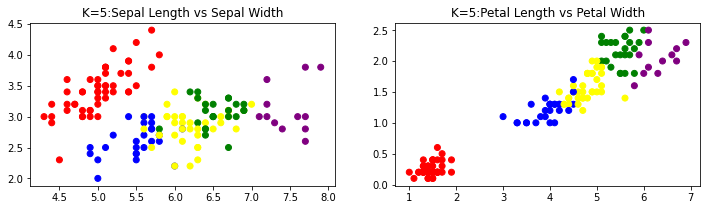

In [200]:
#以5类为例
iris_k_mean_model = KMeans(n_clusters=5)
iris_k_mean_model.fit(x)
print("cluster_labels:")
print(iris_k_mean_model.labels_)
print("cluster_centers:")
print(iris_k_mean_model.cluster_centers_)
#花瓣长度，花瓣宽度的特征分布图
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue', 'yellow' ,'purple'])
predictedY = np.choose(iris_k_mean_model.labels_, [0, 1, 2, 3 ,4]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[predictedY])
plt.title("K=5:Sepal Length vs Sepal Width")
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("K=5:Petal Length vs Petal Width")

In [201]:
#K=5 3D绘图
iris = datasets.load_iris()
iris_df = pd.DataFrame({
        'x0':[iris.data[i][0] for i in range(len(iris.data))],
        'x1':[iris.data[i][1] for i in range(len(iris.data))],
        'x2':[iris.data[i][2] for i in range(len(iris.data))],
        'x3':[iris.data[i][3] for i in range(len(iris.data))],
        'type':iris_k_mean_model.labels_
    })

#典型的DataFrame数据筛选操作（方括号内的布尔表达式）
df_type0=iris_df[iris_df.type==0]
df_type1=iris_df[iris_df.type==1]
df_type2=iris_df[iris_df.type==2]
df_type3=iris_df[iris_df.type==3]
df_type4=iris_df[iris_df.type==4]

data_type0=[[df_type0.x0.iloc[i],df_type0.x1.iloc[i],df_type0.x2.iloc[i]] for i in range(df_type0.shape[0])]
data_type1=[[df_type1.x0.iloc[i],df_type1.x1.iloc[i],df_type1.x2.iloc[i]] for i in range(df_type1.shape[0])]
data_type2=[[df_type2.x0.iloc[i],df_type2.x1.iloc[i],df_type2.x2.iloc[i]] for i in range(df_type2.shape[0])]
data_type3=[[df_type3.x0.iloc[i],df_type3.x1.iloc[i],df_type3.x2.iloc[i]] for i in range(df_type3.shape[0])]
data_type4=[[df_type4.x0.iloc[i],df_type4.x1.iloc[i],df_type4.x2.iloc[i]] for i in range(df_type4.shape[0])]
def scatter3d_base() -> Scatter3D:
    c = (
        Scatter3D()
        .add("", data_type0)
        .add("", data_type1)
        .add("", data_type2)
        .add("", data_type3)
        .add("", data_type4)
        .set_global_opts(
            title_opts=opts.TitleOpts("Wj_irisclf"),
            # visualmap_opts=opts.VisualMapOpts(range_color=Faker.visual_color),
            # visualmap_opts=opts.VisualMapOpts(range_color=['#ff0000','#00ff00','#0000ff']),        
        )
        .set_colors(['#ff0000','#00ff00','#0000ff','yellow','purple'])
    )
    return c

iris_scatter3d = scatter3d_base()
iris_scatter3d.render()

'/content/render.html'

3、自编程Kmeans

In [202]:
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

In [203]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [204]:
dataset['class'][dataset['class']=='Iris-setosa']=0
dataset['class'][dataset['class']=='Iris-versicolor']=1
dataset['class'][dataset['class']=='Iris-virginica']=2
#对类别进行编码，3个类别分别赋值0，1，2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [205]:
#计算欧氏距离：

def distEclud(vecA, vecB):            #两个向量间欧式距离
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

In [206]:
#初始化聚类中心：从m个特征向量中（本例m=150）随机不重复抽取K个作为K个初始聚类中心

def randChosenCent(dataSet,k):
    # 样本数
    m=shape(dataSet)[0]
    # 初始化列表
    centroidsIndex=[]
    #生成类似于样本索引的列表
    dataIndex=list(range(m))
    for i in range(k):
        #生成随机数
        randIndex=random.randint(0,len(dataIndex))
        #将随机产生的样本的索引放入centroidsIndex
        centroidsIndex.append(dataIndex[randIndex])
        #删除已经被抽中的样本，避免重复
        del dataIndex[randIndex]
    #根据索引获取样本
    centroids = dataSet.iloc[centroidsIndex]
    return mat(centroids)

In [207]:
# Kmeans主函数
def kMeans(dataSet, k):
    # 样本总数
    m = shape(dataSet)[0]
    #分配样本到最近的簇：存[簇序号,距离的平方]
    # m行  2 列
    clusterAssment = mat(zeros((m,2)))
 
    #！！！step1:初始化聚类中心
    centroids = randChosenCent(dataSet, k)
    print('最初的中心=',centroids)
 
    #！！！step2:按距离分类到最近的聚类中心簇clusterAssment
    #标志位，如果迭代前后样本分类发生变化值为True，否则为False
    clusterChanged = True
    #查看迭代次数
    iterTime=0
    #！！！终止条件：所有样本分配结果不再改变（clusterChanged==False），迭代终止
    while clusterChanged:   
        clusterChanged = False        
        for i in range(m):
            #初始定义距离为无穷大
            minDist = inf;
            #初始化索引值
            minIndex = -1
            # 计算每个样本与k个中心点距离
            for j in range(k):
                #计算第i个样本到第j个中心点的距离
                distJI = distEclud(centroids[j,:],dataSet.values[i,:])
                #判断距离是否为最小
                if distJI < minDist:
                    #更新获取到最小距离
                    minDist = distJI
                    #获取对应的簇序号
                    minIndex = j
            #样本上次分配结果跟本次不一样，标志位clusterChanged置True
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2 #分配样本到最近的簇
        iterTime+=1
        sse=sum(clusterAssment[:,1])
        print('第%d次迭代'%iterTime + '所有样本到聚类中心距离的平方为： %f'%sse)
    #！！！step3:更新聚类中心
        for cent in range(k):#样本分配结束后，重新计算聚类中心
            #获取该簇所有的样本点
            ptsInClust = dataSet.iloc[nonzero(clusterAssment[:,0].A==cent)[0]]
            #更新聚类中心：axis=0沿列方向求均值。
            centroids[cent,:] = mean(ptsInClust, axis=0) 
    return centroids, clusterAssment

In [208]:
#聚类后前2维特征聚类效果显示
def datashow(dataSet,k,centroids,clusterAssment):  #二维空间显示聚类结果
    from matplotlib import pyplot as plt
    num,dim=shape(dataSet)  #样本数num ,维数dim
    
    if dim!=2:#特征数大于2
        print('sorry,the dimension of your dataset is not 2!')
        return 1
    marksamples=['or','ob','og','ok','^r','^b','<g'] #样本图形标记
    if k>len(marksamples):#K大于样本数
        print('sorry,your k is too large,please add length of the marksample!')
        return 1
        #绘所有样本
    for i in range(num):
        markindex=int(clusterAssment[i,0])#矩阵形式转为int值, 簇序号
        #特征维对应坐标轴x,y；样本图形标记及大小
        plt.plot(dataSet.iat[i,0],dataSet.iat[i,1],marksamples[markindex],markersize=6)
 
    #绘中心点            
    markcentroids=['o','*','^']#聚类中心图形标记
    label=['0','1','2']
    c=['yellow','pink','red']
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],markcentroids[i],markersize=15,label=label[i],c=c[i])
        plt.legend(loc = 'upper left')
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') 
   
    plt.title('k-means cluster result') #标题        
    plt.show()

In [209]:
##聚类前前2维特征分类效果显示
def trgartshow(dataSet,k,labels):
    from matplotlib import pyplot as plt
 
    num,dim=shape(dataSet)
    label=['0','1','2']
    marksamples=['ob','or','og','ok','^r','^b','<g']
    # 通过循环的方式，完成分组散点图的绘制
    for i in range(num): 
        plt.plot(datamat.iat[i,0],datamat.iat[i,1],marksamples[int(labels.iat[i,0])],markersize=6 )
    for i in range(0,num,50): 
        plt.plot(datamat.iat[i,0],datamat.iat[i,1],marksamples[int(labels.iat[i,0])],markersize=6,label=label[int(labels.iat[i,0])] )
    plt.legend(loc = 'upper left')
    # 添加轴标签和标题
 
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') 
   
    plt.title('iris true result') #标题 
 
    # 显示图形
    plt.show()   
    #label=labels.iat[i,0]

In [210]:
#聚类前，绘制所有样本点
def originalDatashow(dataSet):
        #样本的个数和特征维数
    num,dim=shape(dataSet)
    marksamples=['ob'] #样本图形标记
    for i in range(num):
        plt.plot(datamat.iat[i,0],datamat.iat[i,1],marksamples[0],markersize=5)
    plt.title('original dataset')
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') #标题
    plt.show()

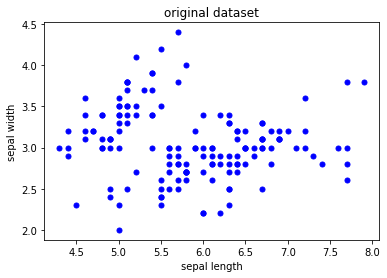

最初的中心= [[5.1 3.8]
 [6.5 3. ]
 [4.7 3.2]]
第1次迭代所有样本到聚类中心距离的平方为： 56.580000
第2次迭代所有样本到聚类中心距离的平方为： 48.783339
第3次迭代所有样本到聚类中心距离的平方为： 47.018281
第4次迭代所有样本到聚类中心距离的平方为： 45.338455
第5次迭代所有样本到聚类中心距离的平方为： 44.384855
第6次迭代所有样本到聚类中心距离的平方为： 43.591498
第7次迭代所有样本到聚类中心距离的平方为： 41.904928
第8次迭代所有样本到聚类中心距离的平方为： 39.066514
第9次迭代所有样本到聚类中心距离的平方为： 38.316500
第10次迭代所有样本到聚类中心距离的平方为： 37.912536
第11次迭代所有样本到聚类中心距离的平方为： 37.423306
第12次迭代所有样本到聚类中心距离的平方为： 37.136261
第13次迭代所有样本到聚类中心距离的平方为： 37.123702


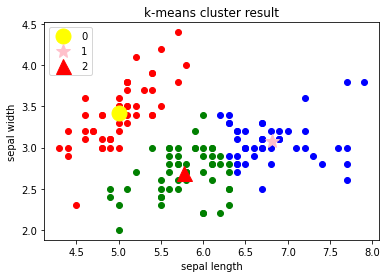

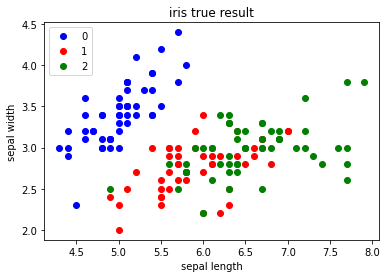

In [212]:
if __name__=='__main__':
#=====kmeans聚类
    # # #获取样本数据
    datamat=dataset.loc[:, ['sepal-length','sepal-width']]
    #真实的标签
    labels=dataset.loc[:, ['class']]
    # #原始数据显示
    originalDatashow(datamat)
 
    # #*****kmeans聚类
    k=3 #用户定义聚类数
    mycentroids,clusterAssment=kMeans(datamat,k)
 
    #绘图显示分别显示聚类后与聚类前的结果
    datashow(datamat,k,mycentroids,clusterAssment)
    trgartshow(datamat,3,labels)

In [214]:
#聚类后前2维特征聚类效果显示
def datashow4(dataSet,k,centroids,clusterAssment):  #二维空间显示聚类结果
    from matplotlib import pyplot as plt
    num,dim=shape(dataSet)  #样本数num ,维数dim
    
    if dim!=2:#特征数大于2
        print('sorry,the dimension of your dataset is not 2!')
        return 1
    marksamples=['or','ob','og','ok','^r','^b','<g'] #样本图形标记
    if k>len(marksamples):#K大于样本数
        print('sorry,your k is too large,please add length of the marksample!')
        return 1
        #绘所有样本
    for i in range(num):
        markindex=int(clusterAssment[i,0])#矩阵形式转为int值, 簇序号
        #特征维对应坐标轴x,y；样本图形标记及大小
        plt.plot(dataSet.iat[i,0],dataSet.iat[i,1],marksamples[markindex],markersize=6)
 
    #绘中心点            
    markcentroids=['o','*','^','H']#聚类中心图形标记
    label=['0','1','2','3']
    c=['yellow','pink','red','blue']
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],markcentroids[i],markersize=15,label=label[i],c=c[i])
        plt.legend(loc = 'upper left')
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') 
   
    plt.title('k-means cluster result') #标题        
    plt.show()

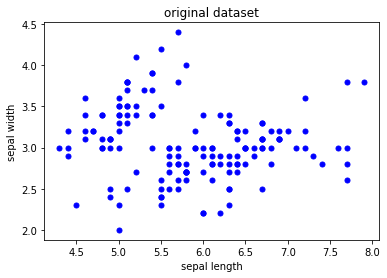

最初的中心= [[6.4 2.8]
 [5.4 3.4]
 [6.5 3. ]
 [5.1 3.7]]
第1次迭代所有样本到聚类中心距离的平方为： 56.440000
第2次迭代所有样本到聚类中心距离的平方为： 34.376649
第3次迭代所有样本到聚类中心距离的平方为： 31.904667
第4次迭代所有样本到聚类中心距离的平方为： 30.881085
第5次迭代所有样本到聚类中心距离的平方为： 30.363410
第6次迭代所有样本到聚类中心距离的平方为： 30.019402
第7次迭代所有样本到聚类中心距离的平方为： 29.820926
第8次迭代所有样本到聚类中心距离的平方为： 29.689426
第9次迭代所有样本到聚类中心距离的平方为： 29.649604


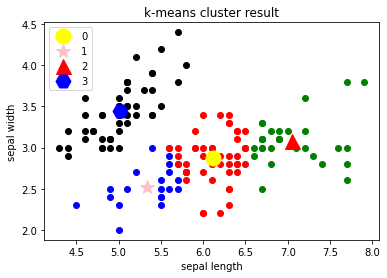

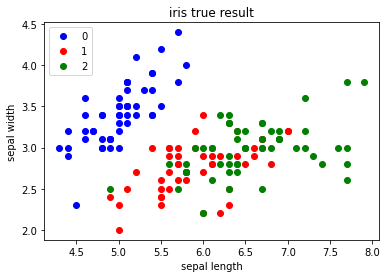

In [215]:
if __name__=='__main__':
#=====kmeans聚类
    # # #获取样本数据
    datamat=dataset.loc[:, ['sepal-length','sepal-width']]
    #真实的标签
    labels=dataset.loc[:, ['class']]
    # #原始数据显示
    originalDatashow(datamat)
 
    # #*****kmeans聚类
    k=4 #用户定义聚类数
    mycentroids,clusterAssment=kMeans(datamat,k)
 
    #绘图显示分别显示聚类后与聚类前的结果
    datashow4(datamat,k,mycentroids,clusterAssment)
    trgartshow(datamat,3,labels)

In [216]:
#聚类后前2维特征聚类效果显示
def datashow5(dataSet,k,centroids,clusterAssment):  #二维空间显示聚类结果
    from matplotlib import pyplot as plt
    num,dim=shape(dataSet)  #样本数num ,维数dim
    
    if dim!=2:#特征数大于2
        print('sorry,the dimension of your dataset is not 2!')
        return 1
    marksamples=['or','ob','og','ok','^r','^b','<g'] #样本图形标记
    if k>len(marksamples):#K大于样本数
        print('sorry,your k is too large,please add length of the marksample!')
        return 1
        #绘所有样本
    for i in range(num):
        markindex=int(clusterAssment[i,0])#矩阵形式转为int值, 簇序号
        #特征维对应坐标轴x,y；样本图形标记及大小
        plt.plot(dataSet.iat[i,0],dataSet.iat[i,1],marksamples[markindex],markersize=6)
 
    #绘中心点            
    markcentroids=['o','*','^','H','>']#聚类中心图形标记
    label=['0','1','2','3','4']
    c=['yellow','pink','red','blue','purple']
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],markcentroids[i],markersize=15,label=label[i],c=c[i])
        plt.legend(loc = 'upper left')
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width') 
   
    plt.title('k-means cluster result') #标题        
    plt.show()

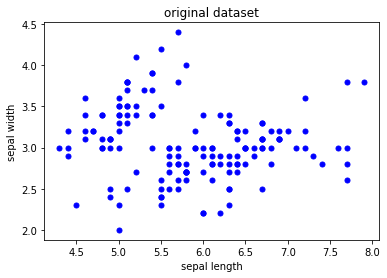

最初的中心= [[5.7 4.4]
 [4.6 3.2]
 [5.9 3. ]
 [5.5 2.3]
 [5.  3.6]]
第1次迭代所有样本到聚类中心距离的平方为： 65.550000
第2次迭代所有样本到聚类中心距离的平方为： 34.451136
第3次迭代所有样本到聚类中心距离的平方为： 29.956360
第4次迭代所有样本到聚类中心距离的平方为： 28.442088
第5次迭代所有样本到聚类中心距离的平方为： 27.289409
第6次迭代所有样本到聚类中心距离的平方为： 26.480479
第7次迭代所有样本到聚类中心距离的平方为： 25.546958
第8次迭代所有样本到聚类中心距离的平方为： 25.433724
第9次迭代所有样本到聚类中心距离的平方为： 25.365365


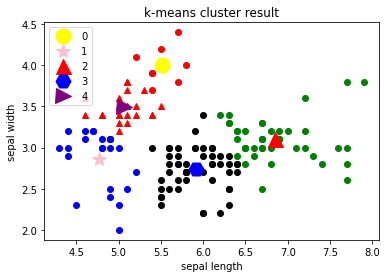

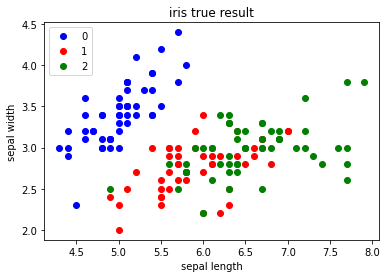

In [217]:
if __name__=='__main__':
#=====kmeans聚类
    # # #获取样本数据
    datamat=dataset.loc[:, ['sepal-length','sepal-width']]
    #真实的标签
    labels=dataset.loc[:, ['class']]
    # #原始数据显示
    originalDatashow(datamat)
 
    # #*****kmeans聚类
    k=5 #用户定义聚类数
    mycentroids,clusterAssment=kMeans(datamat,k)
 
    #绘图显示分别显示聚类后与聚类前的结果
    datashow5(datamat,k,mycentroids,clusterAssment)
    trgartshow(datamat,3,labels)